# Inicialización de R

In [1]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

## Instalación de paquetes

* `dplyr` Para hacer uso de la función `filter`. 

In [2]:
#install.packages("rgl", repos = "http://cran.rstudio.com/")

# SOM
if("kohonen" %in% rownames(installed.packages()) == FALSE) {install.packages("kohonen")}
# Funcion filter
if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr")}

# Conjunto de Datos
Consideramos los datos del archivo `food.txt`; se trata de __961 alimentos, su peso y sus componentes nutriciales__  (__13 caracteríísticas__). La finalidad es entender si hay grupos (clusters) presentes en estos datos. Para eso, __buscamos visualizaciones informativas y usamos técnicas de clustering__.

Como el peso varia, es mejor normalizar dividiendo por el peso; estos son los valores en las ultimas 6 columnas. No usaremos la columna `cluster.id`.

### Lectura de datos
El archivo `food.txt` es contiene datos con cabecera.

In [3]:
# 0. Libreias para manejo de dataframes.
library("dplyr")

# 1. Leemos los datos (Tienen cabecera)
data <- read.table("food.txt", header=TRUE)
# 2. Observamos cantidad de cluster's presente
max(data$cluster.id)
# 2. Removemos la columna cluster.id
data_uncluster <- select(data, -c(cluster.id))

data_uncluster <- mutate(data_uncluster, )
head(data_uncluster)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 10

,Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,25,2,0,2,15.00,0.2,0.13333333,1.6666667,0.13333333,0.00000000,0.1333333,0.013333333
2,6,60,2,0,4,16.00,1.0,0.37500000,3.7500000,0.12500000,0.00000000,0.2500000,0.062500000
3,1,90,22,4,0,28.35,0.1,0.03527337,3.1746032,0.77601411,0.14109347,0.0000000,0.003527337
4,0,90,22,3,0,28.35,0.1,0.00000000,3.1746032,0.77601411,0.10582011,0.0000000,0.003527337
5,0,10,1,1,0,33.00,0.0,0.00000000,0.3030303,0.03030303,0.03030303,0.0000000,0.000000000
6,1,70,21,4,0,28.35,0.1,0.03527337,2.4691358,0.74074074,0.14109347,0.0000000,0.003527337


### Elección de variables
Podemos seleccionar un subconjunto de variables. En este caso hacemos uso de todas las variables disponibles. Se puede elegir omitir la variable del peso pues hemos normalizado con esta variable.

In [4]:
X <- data_uncluster
head(X)

,Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,25,2,0,2,15.00,0.2,0.13333333,1.6666667,0.13333333,0.00000000,0.1333333,0.013333333
2,6,60,2,0,4,16.00,1.0,0.37500000,3.7500000,0.12500000,0.00000000,0.2500000,0.062500000
3,1,90,22,4,0,28.35,0.1,0.03527337,3.1746032,0.77601411,0.14109347,0.0000000,0.003527337
4,0,90,22,3,0,28.35,0.1,0.00000000,3.1746032,0.77601411,0.10582011,0.0000000,0.003527337
5,0,10,1,1,0,33.00,0.0,0.00000000,0.3030303,0.03030303,0.03030303,0.0000000,0.000000000
6,1,70,21,4,0,28.35,0.1,0.03527337,2.4691358,0.74074074,0.14109347,0.0000000,0.003527337


### Algunas observaciones iniciales


#### Valores faltantes y cantidad de observaciones
* Se tienen $961$ observaciones de dimensióón $13$.
* No hay valores faltantes.

In [5]:
# 1. Obtenemos N y d, la cantidad de datos y su dimension
N <- dim(X)[1]
d <- dim(X)[2]
print(c(N, d))
# 2. Observamos datos con valores faltantes (En este caso no)
X[!complete.cases(X),]

[1] 961  13


Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


#### Medias

* Media máxima en variable `Carbohydrates.grams` con un valor de $0.24$, es decir, en promedio el $0.24\%$ de los gramos de cada alimento es de Carbohidratos.

In [6]:
# 1. Calculamos medias de cada variable
means <- t(as.matrix(colMeans(X)))
print("Medias")
round(means, 2)

[1] "Medias"


Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
11.08,270.44,34.01,7.23,32.55,149.41,3.99,0.11,2.25,0.24,0.07,0.26,0.04


#### Varianzas

* Varianza máxima en variable `Food.energy.calories` con un valor de $23.75$.
* Varianza pequeña en la mayoría de las variables.

De aquí podemos empezar a pensar que una variable interesante para la clasificación es la `Food.energy.calories`.

In [7]:
# 2. Calculamos varianzas de cada variable
vars <- t(as.matrix(diag(var(X))))
print("Varianzas")
round(vars, 2)

[1] "Varianzas"


Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
847.56,294759.3,6162.02,102.47,14390.54,30944.1,115.44,0.04,3.75,0.06,0.01,0.46,0


Entonces, a partir de observar la media y varianza de cada variable, podemos decir que

* La proporción de hombres que experimentaron otros fenomenos (resultantes de la pandemia) diferentes a los usados en el cuestionario es __baja y parecida para todos los países__.

* La proporción de hombres afectados en actividades escolares __varía de país en país pero en promedio es alta__.

#### Correlación


* Notamos presencia de variables con coeficiente de correlación alto. Por ejemplo, `Fat.grams` tiene un coeficiente de correlación alto con variables `Food.energy.calories`, `Saturated.fat.grams`.

In [8]:
# 3. Calculamos coeficientes de correlacion
print("Matriz de Correlacion")
round(cor(X), 2)

[1] "Matriz de Correlacion"


,Fat.grams,Food.energy.calories,Carbohydrates.grams,Protein.grams,Cholesterol.mg,weight.grams,Saturated.fat.grams,Fat2.grams,Food.energy2.calories,Carbohydrates2.grams,Protein2.grams,Cholesterol2.mg,Saturated.fat2.grams
Fat.grams,1.00,0.83,0.57,0.46,0.59,0.57,0.83,0.43,0.38,0.00,0.02,0.12,0.32
Food.energy.calories,0.83,1.00,0.88,0.61,0.64,0.80,0.78,0.15,0.28,0.16,-0.03,0.06,0.14
Carbohydrates.grams,0.57,0.88,1.00,0.56,0.54,0.83,0.54,-0.08,0.06,0.32,-0.10,-0.01,-0.07
Protein.grams,0.46,0.61,0.56,1.00,0.55,0.55,0.43,0.00,0.07,-0.03,0.48,0.21,0.01
Cholesterol.mg,0.59,0.64,0.54,0.55,1.00,0.55,0.70,0.06,0.08,0.01,0.09,0.37,0.13
weight.grams,0.57,0.80,0.83,0.55,0.55,1.00,0.59,-0.17,-0.19,-0.04,-0.20,-0.05,-0.13
Saturated.fat.grams,0.83,0.78,0.54,0.43,0.70,0.59,1.00,0.28,0.30,-0.01,-0.01,0.17,0.41
Fat2.grams,0.43,0.15,-0.08,0.00,0.06,-0.17,0.28,1.00,0.82,-0.14,0.16,0.17,0.75
Food.energy2.calories,0.38,0.28,0.06,0.07,0.08,-0.19,0.30,0.82,1.00,0.32,0.26,0.14,0.64
Carbohydrates2.grams,0.00,0.16,0.32,-0.03,0.01,-0.04,-0.01,-0.14,0.32,1.00,-0.09,-0.16,-0.14


# Visualización de datos

## Graficas por parejas de variables
* Dependencia lineal en algunas parejas de variables.
* Presencia de datos atípicos.

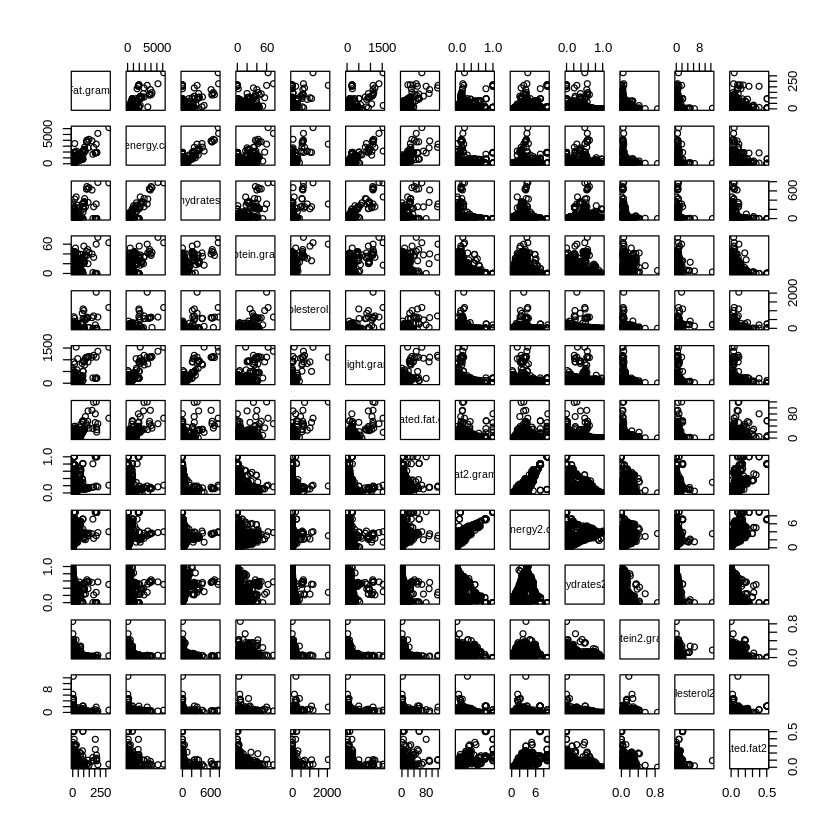

In [9]:
panel.hist <- function(x, ...) {
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col="grey", ...)
}
pairs(X)

## Análisis de Componentes Principales
Obtenemos las Componentes Principales con datos centrados y normalizados.

#### Proporción de Varianza explicada por cada Componente Principal

* Con las primeras $5$ componentes se logra explicar un $88\%$ de la varianza

In [10]:
# 1. Calculo de componentes principales a partir de la matriz de correlacion.
pca <- princomp(X , cor = TRUE)
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.2451583 1.6770738 1.2627070 1.11298255 0.90989905
Proportion of Variance 0.3877489 0.2163520 0.1226484 0.09528694 0.06368587
Cumulative Proportion  0.3877489 0.6041009 0.7267493 0.82203625 0.88572212
                           Comp.6     Comp.7     Comp.8     Comp.9     Comp.10
Standard deviation     0.66517071 0.57159777 0.52607764 0.41620883 0.337987672
Proportion of Variance 0.03403478 0.02513262 0.02128905 0.01332537 0.008787359
Cumulative Proportion  0.91975690 0.94488951 0.96617856 0.97950393 0.988291292
                           Comp.11     Comp.12      Comp.13
Standard deviation     0.303295075 0.235069705 0.0704807107
Proportion of Variance 0.007075992 0.004250597 0.0003821177
Cumulative Proportion  0.995367285 0.999617882 1.0000000000

#### Importancia, por Componente Principal, de cada variable

* Variables que más aportan a la primera componente son `Fat.grams`, `Food.energy.calories`, `Saturated.fat.grams`. Podemos interpretar esta componente como un resumen, con énfasis en las variables mencionadas anteriormente.

* Variables que más aportan a la segunda componente son `Fat2.grams` y `Saturated2.fat.grams`. Entonces esta componente nos indica la proporción de elementos "Fat" en el alimento.

* Variable que más aporta a la tercera componente es `Protein2.grams` y `Cholesterol2.mg`, ambas de manera negativa. 

* Variables que más aporta a la cuarta componente son `Carbohydrates2.grams` y `Protein2.grams`, ambas de manera negativa.
* Variable que más aporta a la quinta componente es `Cholesterol2.mg `.

In [11]:
# 2. Peso de cada variable en cada componente principal
loadings <- pca$loadings
print(loadings)


Loadings:
                      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Fat.grams              0.390         0.112  0.139  0.109  0.236  0.439  0.349
Food.energy.calories   0.421         0.117               -0.132  0.100  0.154
Carbohydrates.grams    0.355 -0.247  0.139 -0.167        -0.426              
Protein.grams          0.304        -0.373 -0.276  0.317 -0.106 -0.153 -0.255
Cholesterol.mg         0.344        -0.205        -0.363  0.441        -0.645
weight.grams           0.335 -0.320         0.162  0.110 -0.298              
Saturated.fat.grams    0.387                0.205         0.447 -0.235  0.338
Fat2.grams             0.128  0.511  0.156  0.114  0.188 -0.186  0.308 -0.335
Food.energy2.calories  0.152  0.467  0.264 -0.297                0.150 -0.126
Carbohydrates2.grams                 0.417 -0.671 -0.376  0.122 -0.117       
Protein2.grams                0.216 -0.520 -0.463  0.324  0.180         0.253
Cholesterol2.mg               0.207 -0.476        -0.

#### Proyección en Componentes Principales

* Podemos notar la presencia de grupos: La mayor parte de los datos se acumula en la zona izquierda de la gráfica, pero en la parte inferior podemos notar que existe una menor cantidad de datos, pero en esta misma zona baja notamos pequeños cúmulos de datos (Distingo 3 o 4 grupos pequeños).

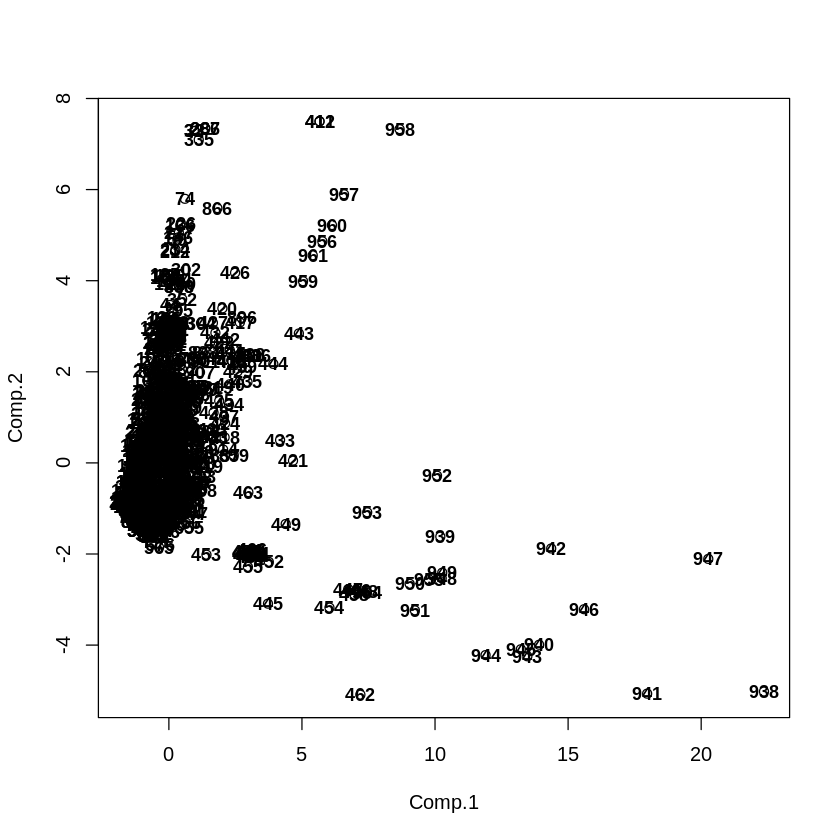

In [12]:
plot(pca$scores[,1:2], xlim = range(pca$scores[,1]), ylim = range(pca$scores[,2]))
text(pca$scores[,1:2], labels=rownames(X), cex=0.9, font=2)

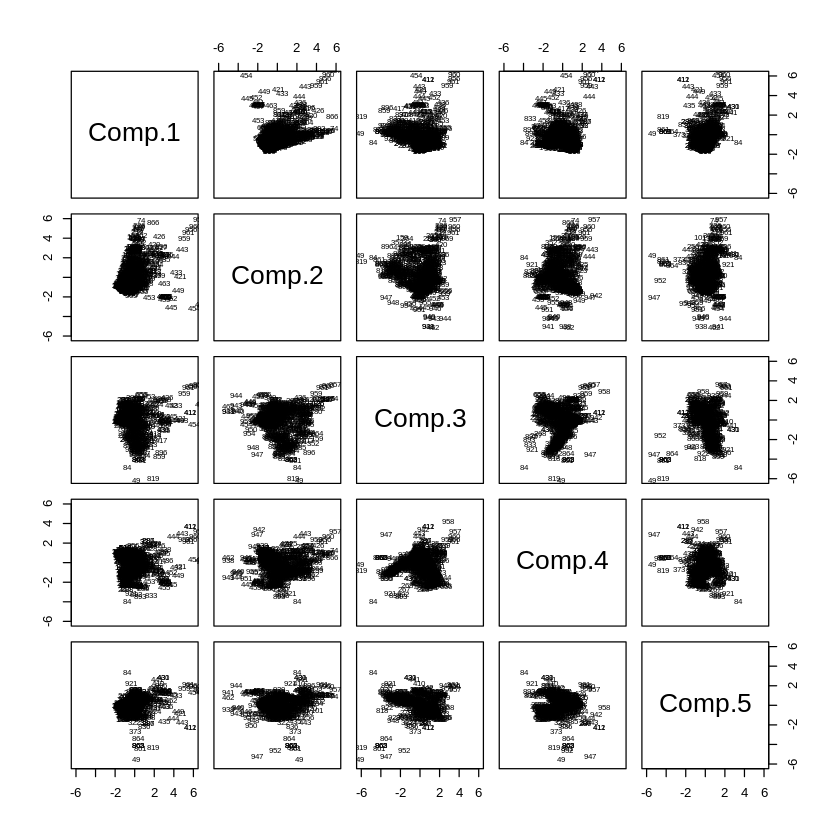

In [13]:
pairs(pca$scores[,1:5], ylim = c(-6, 6), xlim = c(-6, 6),
    panel = function(x,y, ...) {
        text(x, y, abbreviate(row.names(X)),cex = 0.6)
    }
)

Con la gráfica biplot podemos notar que las variables toman en escencia ddos direcciones.

* Hacia arriba podemos notar las variables normalizadas por el peso.

* Hacia abajo-derecha podemos notar las variables sin normalizar.

Por lo anterior podemos pensar que existen de entrada dos grupos grandes, donde el primer grupo se vee influienciado por la proporción de componentes en el alimento, mientras que el segundo por la cantidad en gramos de cada componente.

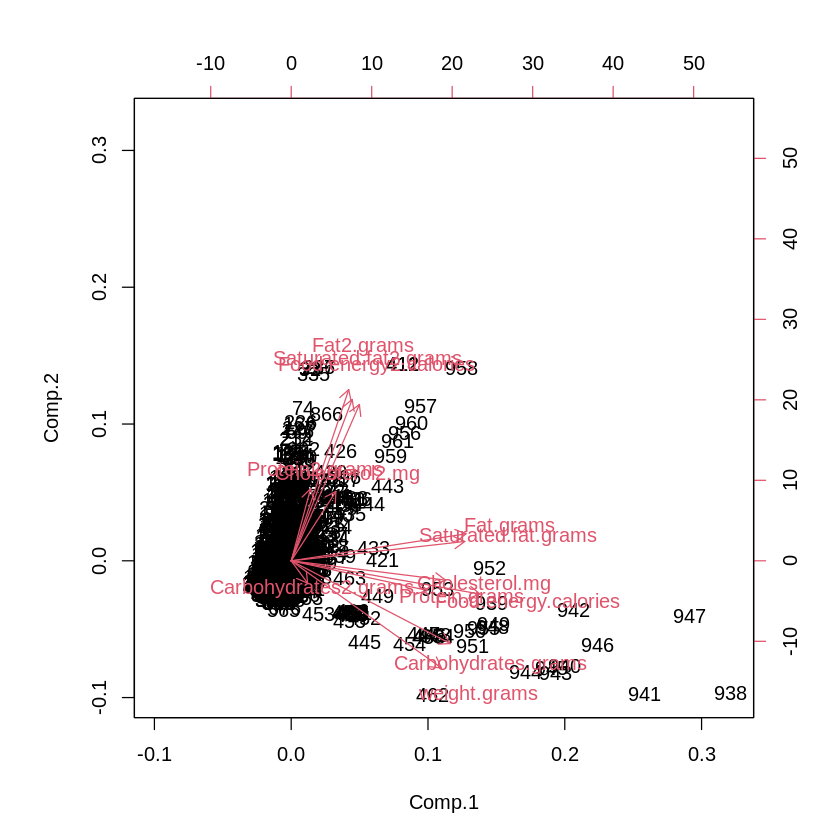

In [14]:
biplot(pca)

# Agrupamiento

## Agrupamiento Jerárquico

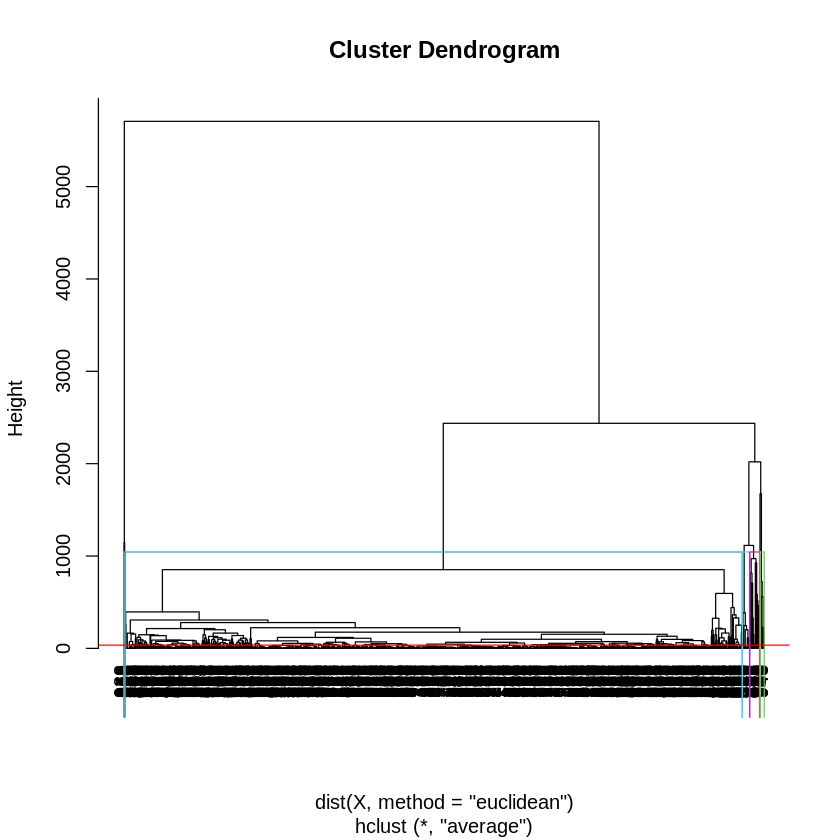

In [15]:
h_average <-hclust(dist(X, method="euclidean"), method="average")
plot(h_average, hang=-1)
# Existe un total de 7 regiones en el mundo
rect.hclust(h_average , k = 7, border = 2:6)
abline(h = 35, col = 'red')

## $K-$Means

Determinamos la cantidad óptima de centroides a utilizar a partir del Método del Codo , este método busca
seleccionar la cantidad ideal de grupos a partir de la optimización de la WCSS (Within Clusters Summed
Squares). Para ello, aplicaremos la función kmeans al conjunto de datos, variando en cada caso el valor de
acumulando los valores de WCSS obtenidos:

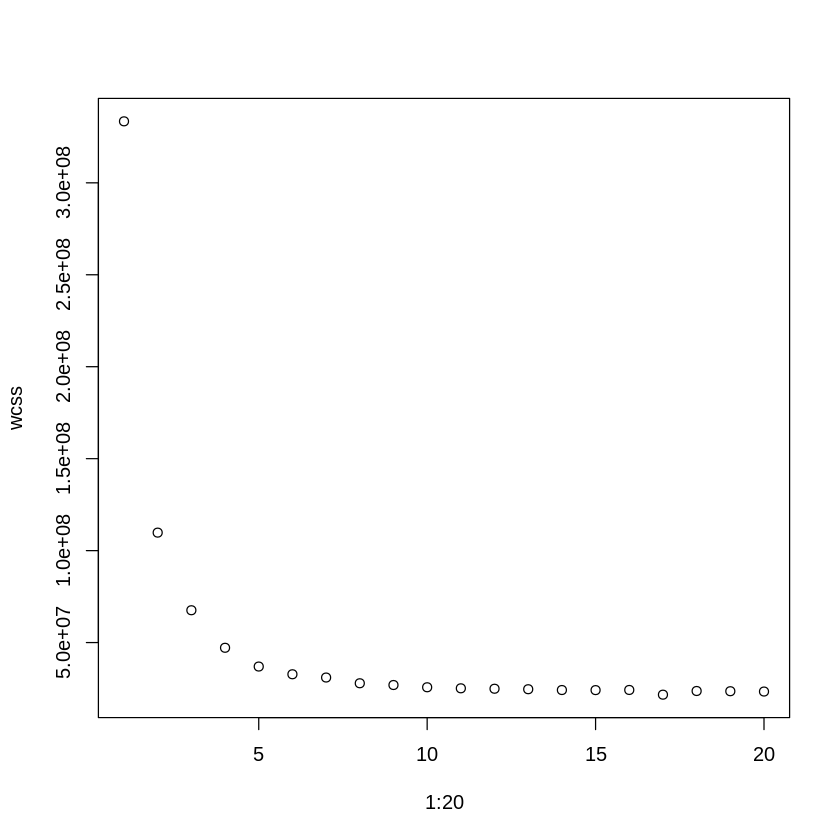

In [16]:
set.seed(1234)
wcss <- vector()
for (i in 1:20){
    wcss[i] <- sum(kmeans(X, i)$withinss)
}
plot(x=1:20, y=wcss)

Notamos que el valor $k$ que indica el método del codo es 5 o 4. Tomamos $k = 5$.

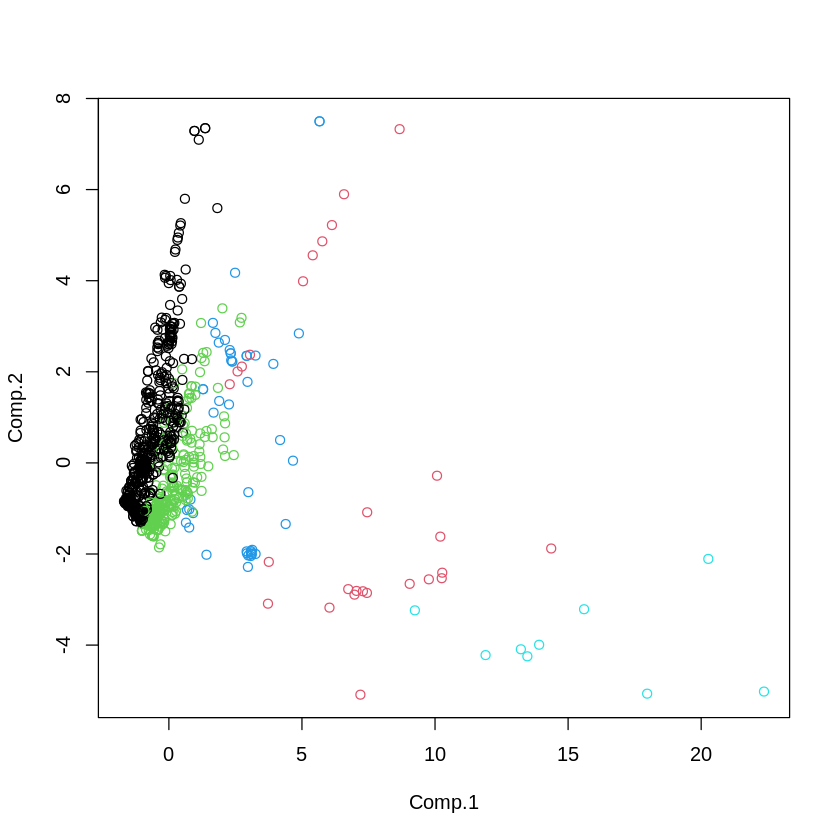

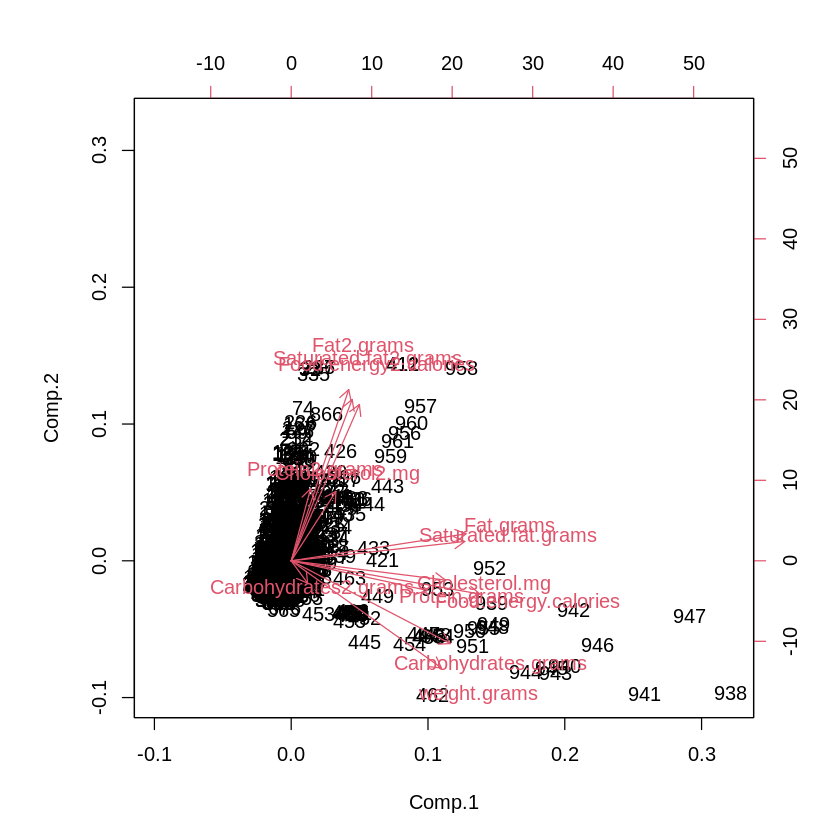

In [26]:
km <- kmeans(X, 5)
plot(pca$scores[,1:2], col=c(1,2,3,4,5)[km$cluster])
biplot(pca)

* Notamos que los cluster se dividen a lo largo de la primera componente

* Comparando los resultados con la gráfica biplot, notamos que los clusters del lado izquierdo tiene estructuras alargadas en dirección de las variables de proporcionalidad de elementos en el alimento.

# Conclusiones

* Notamos la presencia de al menos 5 clusters, de los cuales podemos notar dos clases de grupos.
    * Grupos que se diferencian principalmente por proporción de componentes (Grupos del lado izquierdo), y grupos que se diferencian principalmente por cantidad de cada elemento en el alimento (Grupos del lado abajo-derecha). Se puede intentar separar estos dos conjuntos de variables y hacer un análisis por separado para entender diferencias.
    
* La mayoría de los datos se encuentra en los grupos relacionados con proporción de elementos.
